# Permutation Modulus

We want to compute the *permutation modulus* of a random permutation. Given a permutation $\omega \in S_N$, let $\Gamma$ be the family of all maximal increasing subsequences (**MISS**).  A maximal increasing subsequence is a sequence $$\omega(i_1)<\cdots<\omega(i_k)$$ for a choice of integers $1\le i_1<\cdots< i_k\le N$, that cannot be extended. We denote a **MISS** by $\gamma$ and set $\mathcal{N}(\gamma,j)=1$ if $j=\omega(i_m)$ for some $m$, and $=0$ otherwise. Given a density $\rho\in \mathbb{R}_+^N$:
$$
\ell_\rho(\gamma):=\sum_{j=1}^N  \mathcal{N}(\gamma,j)\rho(j)
$$
Also, $\rho$ is admissible for $\Gamma$ if $\ell_\rho(\gamma)\geq 1$ for all $\gamma\in \Gamma$, and  write $\rho\in{\rm Adm}(\Gamma)$. Then, 
$$
{\rm Mod}(\Gamma) = \inf_{\rho\in{\rm Adm}(\Gamma)} \sum_{j=1}^N \rho(j)^2
$$ 
To compute modulus with our modulus code we need an algorithm that, given a density $\rho$, finds the $\rho$-lightest maximal increasing subsequence in $\omega$. In the paper \cite{atallah-manacher-urrutia:dam1988}  there is an algorithm that is $O(N\log^2 N)$.

## Exercise 1: Implement our modulus code using the Atallah-etal algorithm 

  Given a permutation $\omega$ one builds a graph $G(\omega)$ with vertex set $\{1,\dots,N\}$ and edges $\{i,j\}$ whenever $i<j$ and $\omega^{-1}(i)>\omega^{-1}(j)$. Also a subset $S\subset V$ is a {\it dominating set} if every $x\in V$ is adjacent to $S$, and $S$ is {\it independent} if no to nodes in $S$ are adjacent. One could then consider the family $\Gamma$ of all dominating independent sets (**DIS**) in $V$, and compute the (vertex)-modulus of $\Gamma$. It seems that computing modulus for **DIS** is equivalent to computing modulus for **MISS**.


# Example

Consider the permutation of $1,\dots,20$:

$$
\pi = 7\ 3\ 1\ 17\ 10\ 18\ 9\ 20\ 6\ 12\ 16\ 13\ 2\ 8\ 19\ 4\ 15\ 11\ 14\ 5
$$

Let's graph it as scatter plot.

In [4]:
######################################################################
# import necessary libraries

%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import cvxopt as cvx
from cvxopt.solvers import qp
from fractions import Fraction
import math

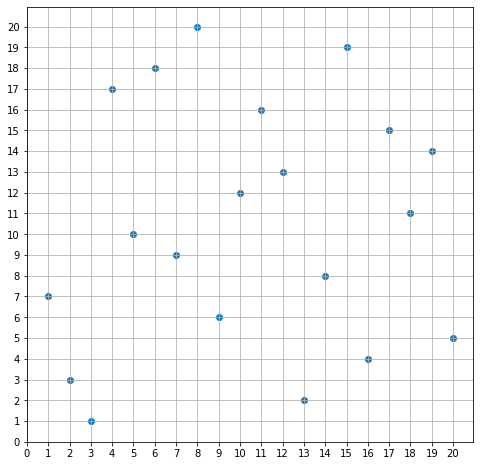

In [5]:
pi =  [7, 3, 1, 17, 10, 18, 9, 20, 6, 12, 16, 13, 2, 8, 19, 4, 15, 11, 14, 5]

x = range(1,21)


# initialize figure
fig, ax = plt.subplots(figsize=(8, 8))
    
plt.scatter(x,pi)

# Set the ticks to be at the edges of the bins.
ax.set_xticks(range(0,21))
ax.set_yticks(range(0,21))
plt.grid(True)


None

In [6]:
len(pi)

20

Here's an example of **MISS** (in fact this a longest increasing subsequence):
$$
1\ 6\ 8\ 11\ 14
$$
corresponding to the indeces $3<9<14<18<19$.

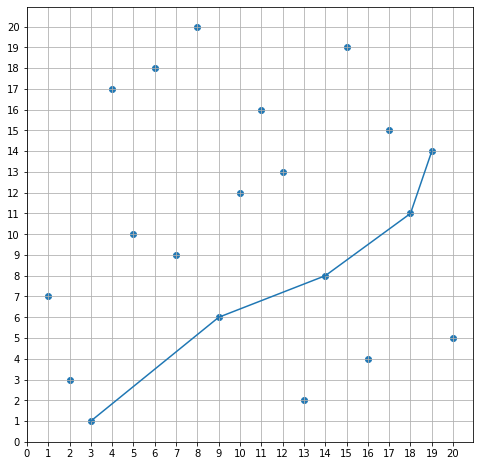

In [7]:
pi =  [7, 3, 1, 17, 10, 18, 9, 20, 6, 12, 16, 13, 2, 8, 19, 4, 15, 11, 14, 5]
x = range(1,21)

ga = [1,6,8,11,14]
I = [3,9,14,18,19]

# initialize figure
fig, ax = plt.subplots(figsize=(8, 8))
    
plt.scatter(x,pi)
plt.plot(I,ga)

# Set the ticks to be at the edges of the bins.
ax.set_xticks(range(0,21))
ax.set_yticks(range(0,21))
plt.grid(True)

None

## Exercise 2: write code for computing all MISS for a given permutation. Also plot the resulting graph of up/right paths, as above.

Note that this is only useful for small permutations. However, for larger ones the modulus computation does not need to know all of the **MISS** in advance. 

Note that the resulting graph will be a subgraph of the graph obtained by saying that two points $(i_1,\pi(i_1))$ and $(i_2,\pi(i_2))$ are connected iff $(i_2-i_1)(\pi(i_2)-\pi(i_1))>0$, because the latter will include also increasing subsequences that are not maximal.

## Exercise 3: Do the same for maximal decreasing sequences (these should form a sort of blocker dual)

# Young Tableaux

Next we recall the theory of Young tableaux.

  * Given a integer $N$ a *partition* of $N$ is $\lambda=(\lambda_1,\dots,\lambda_r)$ so that
     * $\lambda_1\ge \cdots\ge\lambda_r> 0$
     * $|\lambda|:=\sum_{j=1}^r \lambda_j=N$
     
  * We say $r=r(\lambda)$ is the *length* of the partition and write $\lambda\vdash N$.
    
  * A *Young diagram* is a way to represent a partition. For instance $(5,2,2)\vdash 9$ is drawn as follows:
  

In [13]:
yd = [['a', 'b', 'c','d', 'e'],['f','g'],['h','i']]
for item in yd:
    print (item[0], ' '.join(map(str, item[1:])))

a b c d e
f g
h i


  * A *Young tableau* is a Young diagram filled with the numbers $1,\dots,N$.

In [15]:
yt = [[7, 8, 4, 5, 6],[1,2],[3,9]]
for item in yt:
    print (item[0], ' '.join(map(str, item[1:])))

7 8 4 5 6
1 2
3 9


  * A *Standard Young tableau* (SYT) is a Young tableau so that entries increase in both rows and columns.

In [17]:
syt = [[1, 3, 5, 7, 9],[2,4],[6,8]]
for item in syt:
    print (item[0], ' '.join(map(str, item[1:])))

1 3 5 7 9
2 4
6 8


  * The Young diagram underlying a SYT is called the *shape* and we write ${\rm sh}(T)$.
  * The set of all permutations  $S_N$ is in one-to-one correspondence with pairs $(P,Q)$ of SYTs such that
     * ${\rm sh}(P)={\rm sh}(Q)$.
     * ${\rm sh}(P)\vdash N$.
     
## Exercise 4: Implement the algorithm that takes a permutation and gives the corresponding pair of SYT, as well as the inverse operation.

  * The forward direction is based on an operation called *row insertion*.
    * Suppose $x\not \in P$. Let $R$ be the first row of $P$.
    * While $x<\max R$:
      * Let $y=\min\{z\in R: z>x\}$
      * Replace $y$ by $x$
      * Set $x:=y$ and $R$ equal to the next row.
    * Place $x$ at the end of row $R$ and stop.